# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [45]:
import cv2
import numpy as np
from cv2plt import *

# 以灰階方式讀入圖片
img_query = cv2.imread('../dian/jpg/0019-1.jpg', 0)
img_train = cv2.imread('../dian/jpg/0019.jpg', 0)

# 建立 SIFT 物件
sift = cv2.xfeatures2d.SIFT_create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)
print(kp_query, 
      des_query.shape)
print(len(kp_train), 
      des_train.shape)

[<KeyPoint 000002112DBCA570>, <KeyPoint 000002112DBCA780>, <KeyPoint 000002112DBCA690>, <KeyPoint 000002112DBCA4E0>, <KeyPoint 000002110D290900>, <KeyPoint 000002110D290930>, <KeyPoint 000002110D290810>, <KeyPoint 000002110D2903F0>, <KeyPoint 000002110D290AB0>, <KeyPoint 000002110D2906F0>, <KeyPoint 0000021131DB6990>, <KeyPoint 0000021131DB69C0>, <KeyPoint 0000021131DB6A80>, <KeyPoint 0000021131DB61E0>, <KeyPoint 0000021131DB6F30>, <KeyPoint 0000021131DB6900>, <KeyPoint 0000021131DB6A50>, <KeyPoint 0000021131DB6960>, <KeyPoint 0000021131DB6A20>, <KeyPoint 0000021131DB6930>, <KeyPoint 0000021131DB6870>, <KeyPoint 0000021131DB67B0>, <KeyPoint 0000021131DB68D0>, <KeyPoint 000002112D9353F0>, <KeyPoint 000002112D935AE0>, <KeyPoint 000002112D935600>, <KeyPoint 000002112D9355D0>, <KeyPoint 000002112D9351B0>, <KeyPoint 000002112D935B40>, <KeyPoint 000002112D935B10>, <KeyPoint 000002112D935AB0>, <KeyPoint 000002112D9350C0>, <KeyPoint 000002112D935C60>, <KeyPoint 000002112D935510>, <KeyPoint 000

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

In [28]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# print(matches)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    print(m, m.distance)
    if m.distance < 0.75*n.distance:
        candidate.append([m])
# print(candidate)

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

<DMatch 00000211316323D0> 288.0138854980469
<DMatch 00000211308A4C30> 318.3017578125
<DMatch 000002112D8FCE50> 296.81475830078125
<DMatch 000002112D8FCEB0> 283.2596130371094
<DMatch 000002112DCAA370> 304.09210205078125
<DMatch 000002112DCAA490> 307.3369445800781
<DMatch 000002112DCAA510> 366.3700256347656
<DMatch 000002112DCAA4F0> 248.74082946777344
<DMatch 000002112DCAA330> 326.8746032714844
<DMatch 000002112DCAA1D0> 231.689453125
<DMatch 000002112DCAA0B0> 323.7637939453125
<DMatch 000002112DCAA6F0> 335.8943176269531
<DMatch 000002112DCAA6D0> 280.9039001464844
<DMatch 000002112DCAA7B0> 116.5804443359375
<DMatch 000002112DCAA790> 238.87025451660156
<DMatch 000002112DCAA030> 169.69679260253906
<DMatch 000002112DCAA590> 277.9514465332031
<DMatch 000002112DCAA730> 310.7378234863281
<DMatch 000002112DCAA810> 336.4476318359375
<DMatch 000002112DCAA850> 316.3731994628906
<DMatch 000002112DCAA890> 222.602783203125
<DMatch 000002112DCAA8D0> 314.63470458984375
<DMatch 000002112DCAA910> 246.7042

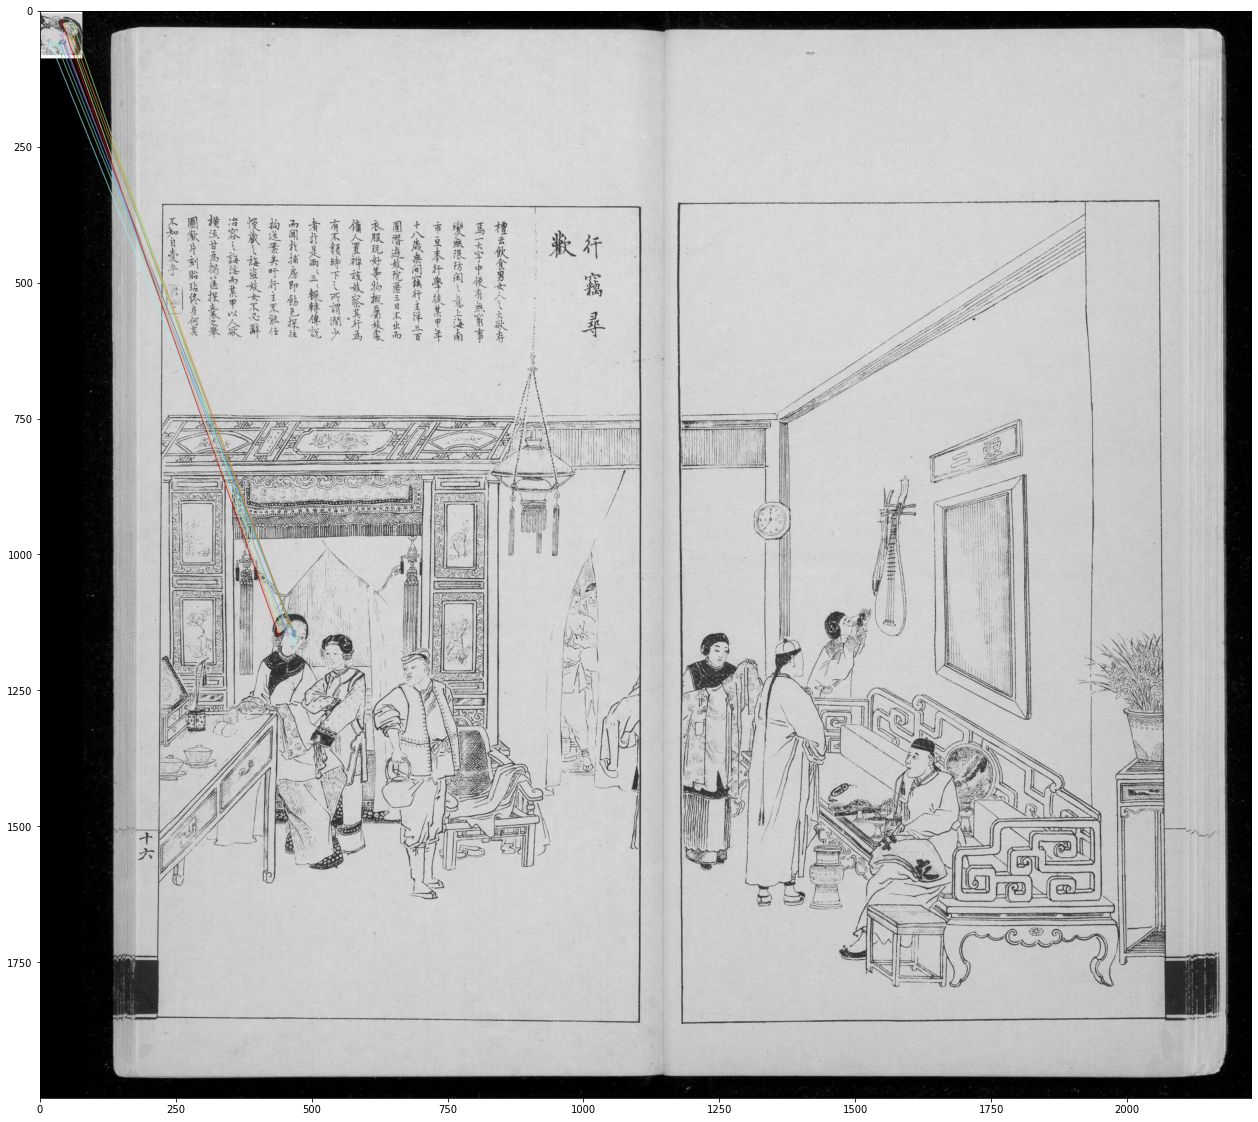

In [29]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(30, 20))

f.add_subplot(1, 1, 1)
plt.imshow(cv2plt(img_show))

plt.show(block=True)

In [ ]:
# SURF

In [33]:
cv2.__version__
surf = cv2.xfeatures2d.SURF_create(4000)
kp_query, des_query = surf.detectAndCompute(img_query, None)
kp_train, des_train = surf.detectAndCompute(img_train, None)

In [39]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# print(matches)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    print(m, m.distance)
    if m.distance < 0.75*n.distance:
        candidate.append([m])
# print(candidate)

# 顯示配對結果
# img_left = cv2.drawKeypoints(img_query, kp_query, img_query)
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

<DMatch 00000211308A8A10> 0.15582403540611267
<DMatch 00000211308A89F0> 0.30021366477012634
<DMatch 00000211308A89B0> 0.24102948606014252
<DMatch 000002113169B550> 0.17968174815177917
<DMatch 000002113169BB50> 0.2697431147098541
<DMatch 000002112DC26D90> 0.16773878037929535
<DMatch 000002112DC74910> 0.17434248328208923


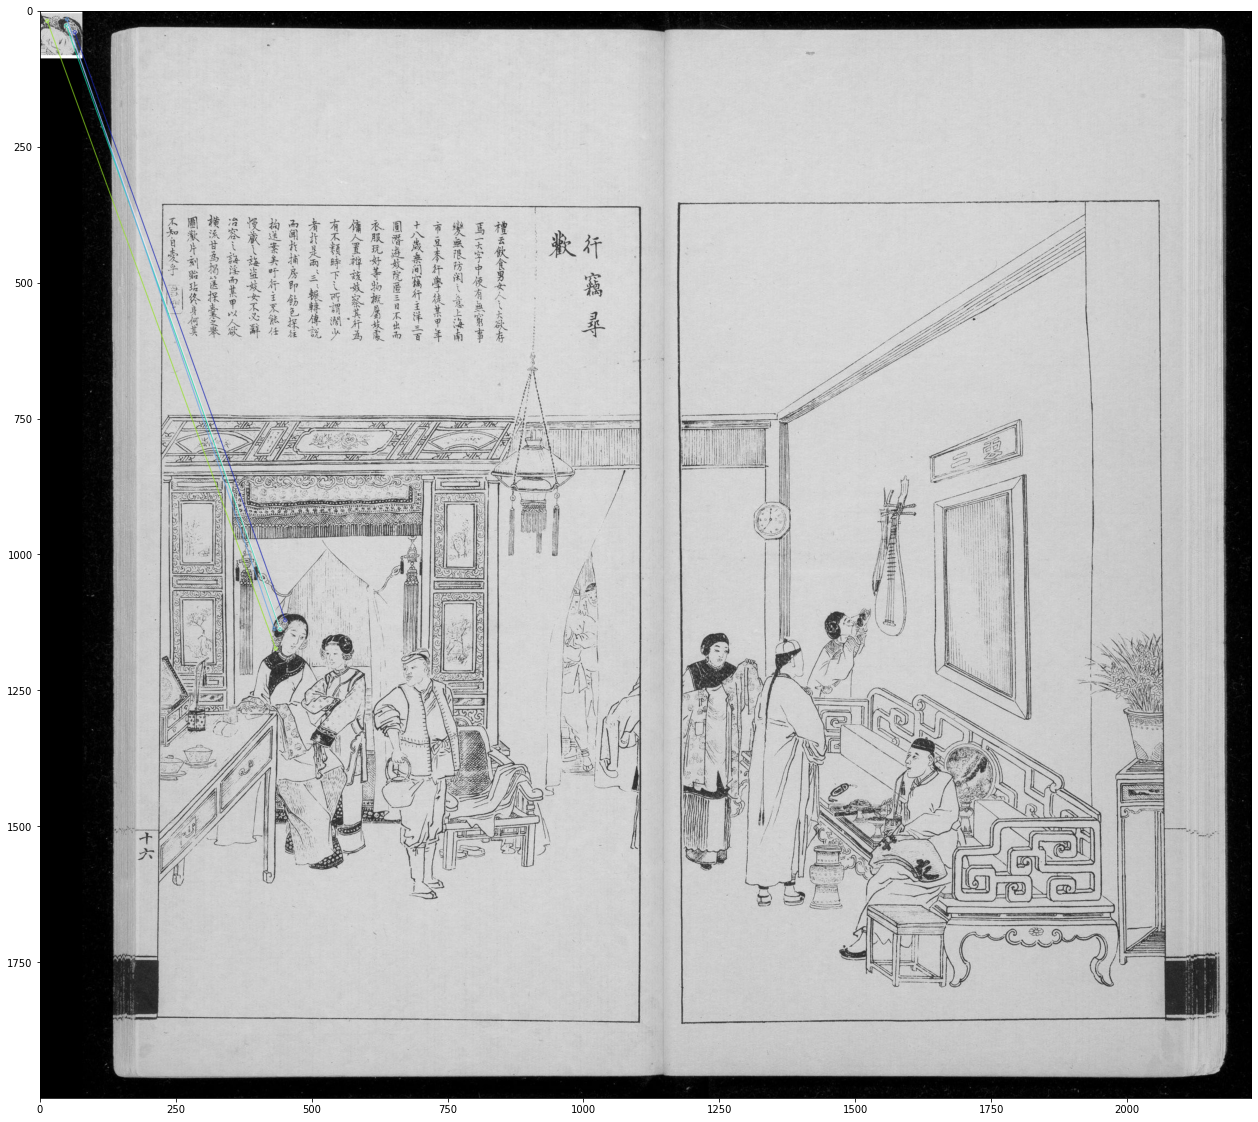

In [40]:
f = plt.figure(figsize=(30, 20))

f.add_subplot(1, 1, 1)
plt.imshow(cv2plt(img_show))

plt.show(block=True)

In [46]:
orb = cv2.ORB_create()
kp_query, des_query = orb.detectAndCompute(img_query, None)
kp_train, des_train = orb.detectAndCompute(img_train, None)

In [47]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# print(matches)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    print(m, m.distance)
    if m.distance < 0.75*n.distance:
        candidate.append([m])
# print(candidate)

# 顯示配對結果
# img_left = cv2.drawKeypoints(img_query, kp_query, img_query)
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

<DMatch 000002112DD67D10> 442.6341552734375
<DMatch 000002112DDD0BB0> 315.26495361328125
<DMatch 000002112DDD0750> 399.2417907714844
<DMatch 000002112DDD09F0> 397.77001953125
<DMatch 000002112DDD0550> 352.8172302246094
<DMatch 000002112DDD0A10> 386.277099609375
<DMatch 000002112DDD0890> 314.7999267578125
<DMatch 000002112DDD08B0> 332.7551574707031
<DMatch 000002112DDD0BD0> 294.72528076171875
<DMatch 000002112DDD0C30> 282.13470458984375
<DMatch 000002112DDD0C90> 295.98309326171875
<DMatch 000002112DDD0CF0> 314.73956298828125
<DMatch 000002112DDD0A90> 350.5852355957031
<DMatch 000002112DDD0AB0> 366.62652587890625
<DMatch 000002112DDD0C50> 317.7640686035156


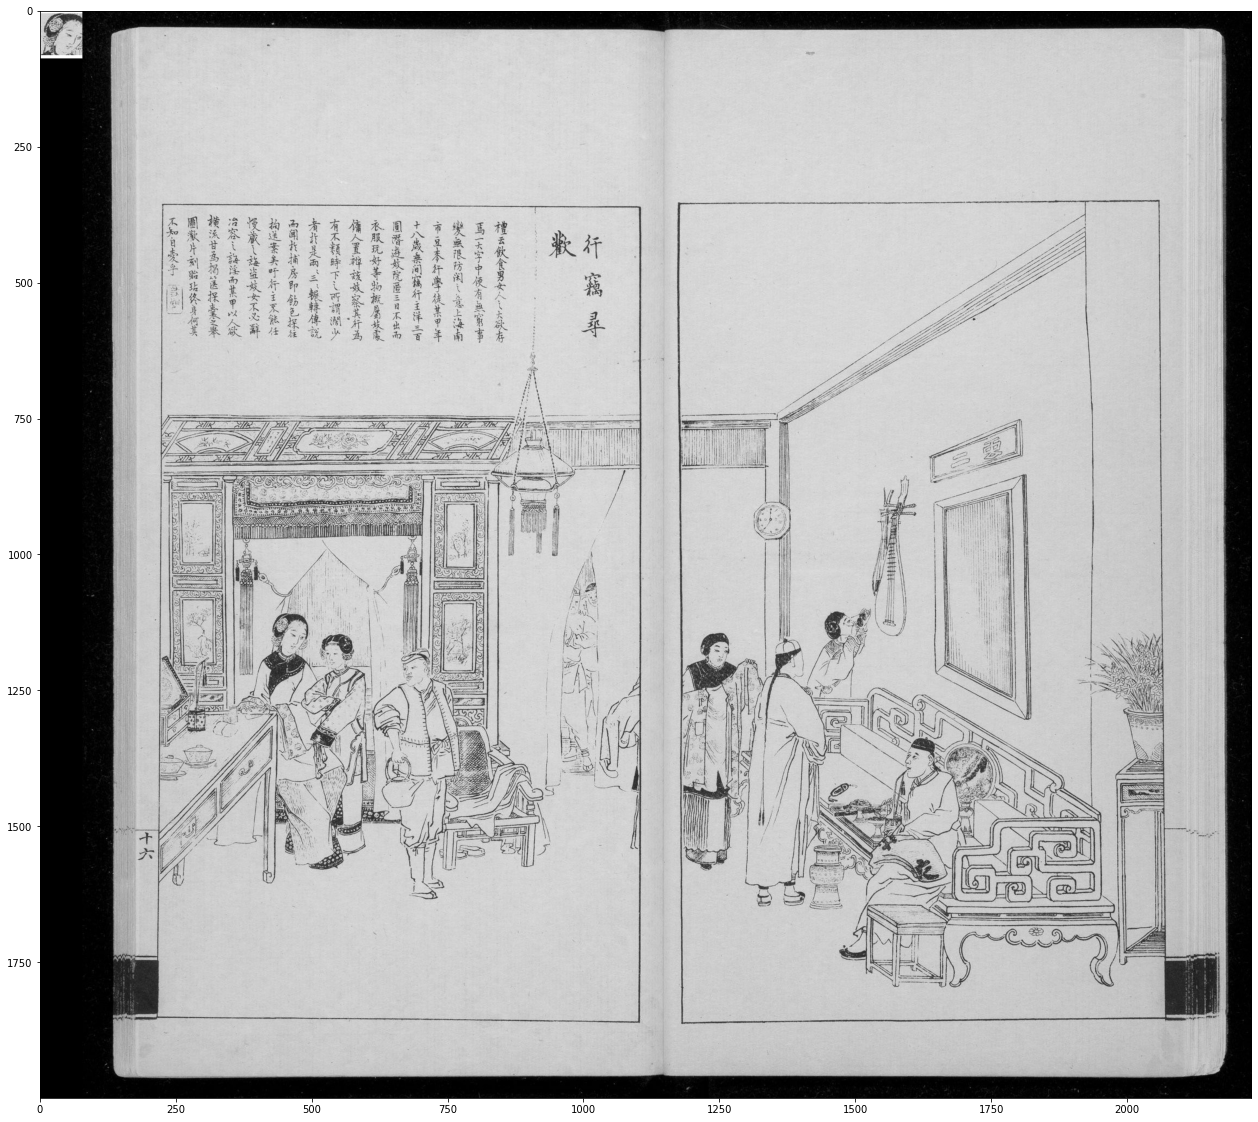

In [48]:
f = plt.figure(figsize=(30, 20))

f.add_subplot(1, 1, 1)
plt.imshow(cv2plt(img_show))

plt.show(block=True)